In [10]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
dataset = od.download('https://www.kaggle.com/datasets/cvengr/us-dollar-exchange-rates?select=exchange_rate.csv')

Skipping, found downloaded files in "./us-dollar-exchange-rates" (use force=True to force download)


# Introduction:

The purpose of this notebook is to explore and understand the DatetimeIndex in pandas. We'll look at partial strings when they're provided to the ```.loc``` attribute, as well as things like ```.ffill``` and ```.bfill``` if we have any missing data. The data comes from Kaggle and has been imported using opendatasets. I'll also take some time to compare matplotlib and seaborn as visualization tools. Let's begin by getting our data from the .csv file.

In [12]:
# getting the data into a dataframe
data = pd.read_csv('us-dollar-exchange-rates/exchange_rate.csv')
data.head()

,Currency,2022-10-09,2022-10-08,2022-10-07,2022-10-06,2022-10-05,2022-10-04,2022-10-03,2022-10-02,2022-10-01,...,2021-10-19,2021-10-18,2021-10-17,2021-10-16,2021-10-15,2021-10-14,2021-10-13,2021-10-12,2021-10-11,2021-10-10
0,EUR,1.026575,1.026655,1.022323,1.018879,1.013599,1.002286,1.019629,1.020184,1.020042,...,0.859692,0.861496,0.861967,0.862110,0.862511,0.862679,0.864266,0.866563,0.864130,0.864361
1,GBP,0.901799,0.901422,0.899852,0.895888,0.887287,0.873880,0.887196,0.896315,0.895387,...,0.724328,0.728614,0.728405,0.728962,0.726917,0.730706,0.732944,0.735178,0.733981,0.734565
2,INR,82.815406,82.831603,82.598080,82.114846,81.646995,81.451499,81.564234,81.592623,81.569652,...,75.100380,75.314305,75.038254,75.066698,74.972446,75.068794,75.321664,75.458774,75.440350,75.163641
3,AUD,1.567035,1.567298,1.564782,1.557739,1.547420,1.540775,1.538110,1.556323,1.559839,...,1.336667,1.348544,1.348409,1.348377,1.348582,1.347732,1.356789,1.358192,1.357285,1.369552
4,CAD,1.375648,1.373856,1.369535,1.372447,1.366558,1.355457,1.365132,1.384204,1.383634,...,1.235378,1.236399,1.237029,1.237815,1.238766,1.236370,1.244922,1.244235,1.245718,1.247054


# About the data:

Currently, we see the data is described by the date, depending on the currency. First, I'll check to see the datatypes we have here:

In [13]:
data.dtypes

Currency       object
2022-10-09    float64
2022-10-08    float64
2022-10-07    float64
2022-10-06    float64
               ...   
2021-10-14    float64
2021-10-13    float64
2021-10-12    float64
2021-10-11    float64
2021-10-10    float64
Length: 366, dtype: object

The currencies were imported as objects and their changing rates were imported as floats. Now we'll get some other information from the data.

In [14]:
data.shape

(53, 366)

We have fifty-three rows, one for each currency, and a year's worth of data about each of them.

In [15]:
data.isna().any()

Currency      False
2022-10-09    False
2022-10-08    False
2022-10-07    False
2022-10-06    False
              ...  
2021-10-14    False
2021-10-13    False
2021-10-12    False
2021-10-11    False
2021-10-10    False
Length: 366, dtype: bool

We don't have any missing data here!

In [16]:
data.columns

Index(['Currency', '2022-10-09', '2022-10-08', '2022-10-07', '2022-10-06',
       '2022-10-05', '2022-10-04', '2022-10-03', '2022-10-02', '2022-10-01',
       ...
       '2021-10-19', '2021-10-18', '2021-10-17', '2021-10-16', '2021-10-15',
       '2021-10-14', '2021-10-13', '2021-10-12', '2021-10-11', '2021-10-10'],
      dtype='object', length=366)

Now that we've gotten some basic information about the structure of our data and its contents, we can start exploring it. The most recent date in the data set is October 9th, 2022. So, if we wanted to look at the beginning of the month, we could do something like this:

In [17]:
october = data.iloc[:, :10]
october

,Currency,2022-10-09,2022-10-08,2022-10-07,2022-10-06,2022-10-05,2022-10-04,2022-10-03,2022-10-02,2022-10-01
0,EUR,1.026575,1.026655,1.022323,1.018879,1.013599,1.002286,1.019629,1.020184,1.020042
1,GBP,0.901799,0.901422,0.899852,0.895888,0.887287,0.873880,0.887196,0.896315,0.895387
2,INR,82.815406,82.831603,82.598080,82.114846,81.646995,81.451499,81.564234,81.592623,81.569652
3,AUD,1.567035,1.567298,1.564782,1.557739,1.547420,1.540775,1.538110,1.556323,1.559839
4,CAD,1.375648,1.373856,1.369535,1.372447,1.366558,1.355457,1.365132,1.384204,1.383634
5,SGD,1.433110,1.433026,1.431317,1.428843,1.427630,1.424656,1.431702,1.432102,1.433700
6,CHF,0.995222,0.994566,0.991899,0.989355,0.984197,0.980753,0.993042,0.988656,0.987119
7,MYR,4.651077,4.651033,4.650129,4.637534,4.631164,4.645275,4.647979,4.637838,4.637470
8,JPY,145.569646,145.362732,145.205682,144.876758,144.743666,144.321465,144.498033,144.968527,144.735712
9,CNY,7.108592,7.113716,7.116829,7.116277,7.116289,7.116123,7.120949,7.103390,7.112429


That bit of code did give us the desired result, but there may be a better way to explore our data. Let's see what happens when we transpose the data:

In [18]:
# 'tdata' is 'transposed data'
tdata = data.transpose()
tdata.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
Currency,EUR,GBP,INR,AUD,CAD,SGD,CHF,MYR,JPY,CNY,...,SAR,ZAR,LKR,SEK,TWD,THB,TTD,TRY,AED,VEF
2022-10-09,1.026575,0.901799,82.815406,1.567035,1.375648,1.43311,0.995222,4.651077,145.569646,7.108592,...,3.75,18.005929,364.188388,11.224991,31.753419,37.623741,6.770081,18.570743,3.6725,819495.007127
2022-10-08,1.026655,0.901422,82.831603,1.567298,1.373856,1.433026,0.994566,4.651033,145.362732,7.113716,...,3.75,18.096037,364.220655,11.226735,31.76877,37.623635,6.770388,18.577722,3.6725,819494.936494
2022-10-07,1.022323,0.899852,82.59808,1.564782,1.369535,1.431317,0.991899,4.650129,145.205682,7.116829,...,3.75,18.093471,365.90403,11.174542,31.712074,37.555197,6.78705,18.588653,3.6725,819530.322647
2022-10-06,1.018879,0.895888,82.114846,1.557739,1.372447,1.428843,0.989355,4.637534,144.876758,7.116277,...,3.75,17.929514,365.992277,11.105921,31.550362,37.379236,6.781602,18.591595,3.6725,819396.909491


We've moved the dates to the index and the currencies to the columns. I noticed here that there are no index numbers beside the dates. In order to clean up the dataframe, I wrote this bit of code and then took a look at the result.

In [19]:
# this will take the names of the columns and put them in place of the integers seen in the call to .head() above
tdata = tdata.rename(columns = tdata.iloc[0]).iloc[1:]

# now what does it look like?
tdata.head(n = 10)

,EUR,GBP,INR,AUD,CAD,SGD,CHF,MYR,JPY,CNY,...,SAR,ZAR,LKR,SEK,TWD,THB,TTD,TRY,AED,VEF
2022-10-09,1.026575,0.901799,82.815406,1.567035,1.375648,1.43311,0.995222,4.651077,145.569646,7.108592,...,3.75,18.005929,364.188388,11.224991,31.753419,37.623741,6.770081,18.570743,3.6725,819495.007127
2022-10-08,1.026655,0.901422,82.831603,1.567298,1.373856,1.433026,0.994566,4.651033,145.362732,7.113716,...,3.75,18.096037,364.220655,11.226735,31.76877,37.623635,6.770388,18.577722,3.6725,819494.936494
2022-10-07,1.022323,0.899852,82.59808,1.564782,1.369535,1.431317,0.991899,4.650129,145.205682,7.116829,...,3.75,18.093471,365.90403,11.174542,31.712074,37.555197,6.78705,18.588653,3.6725,819530.322647
2022-10-06,1.018879,0.895888,82.114846,1.557739,1.372447,1.428843,0.989355,4.637534,144.876758,7.116277,...,3.75,17.929514,365.992277,11.105921,31.550362,37.379236,6.781602,18.591595,3.6725,819396.909491
2022-10-05,1.013599,0.887287,81.646995,1.54742,1.366558,1.42763,0.984197,4.631164,144.743666,7.116289,...,3.75,17.836007,365.990202,10.992073,31.622162,37.508595,6.765191,18.573197,3.6725,818141.148683
2022-10-04,1.002286,0.87388,81.451499,1.540775,1.355457,1.424656,0.980753,4.645275,144.321465,7.116123,...,3.75,17.627605,366.007983,10.857141,31.662603,37.439678,6.768183,18.578309,3.6725,815698.927272
2022-10-03,1.019629,0.887196,81.564234,1.53811,1.365132,1.431702,0.993042,4.647979,144.498033,7.120949,...,3.75,17.880177,360.023271,11.032393,31.839381,37.872883,6.776952,18.547562,3.6725,818838.869706
2022-10-02,1.020184,0.896315,81.592623,1.556323,1.384204,1.432102,0.988656,4.637838,144.968527,7.10339,...,3.75,18.136853,364.179049,11.083284,31.842223,37.8518,6.775012,18.526833,3.6725,816845.035713
2022-10-01,1.020042,0.895387,81.569652,1.559839,1.383634,1.4337,0.987119,4.63747,144.735712,7.112429,...,3.75,18.099842,364.179049,11.092459,31.846825,37.85266,6.776418,18.503267,3.6725,816845.039181
2022-09-30,1.021677,0.898448,81.38356,1.553622,1.375103,1.434735,0.98435,4.636509,144.715574,7.115939,...,3.75,18.070353,365.471854,11.122885,31.79168,37.732783,6.788173,18.535192,3.6725,816959.962222


We now have a year's worth of data in the index, with the currencies as individual columns. I checked the datatype of the index and the dated were shown as objects, so I converted it to a DatetimeIndex like so: 

In [20]:
# we'll need to subset the index
tdata.index = pd.to_datetime(tdata.index)
tdata.index

DatetimeIndex(['2022-10-09', '2022-10-08', '2022-10-07', '2022-10-06',
               '2022-10-05', '2022-10-04', '2022-10-03', '2022-10-02',
               '2022-10-01', '2022-09-30',
               ...
               '2021-10-19', '2021-10-18', '2021-10-17', '2021-10-16',
               '2021-10-15', '2021-10-14', '2021-10-13', '2021-10-12',
               '2021-10-11', '2021-10-10'],
              dtype='datetime64[ns]', length=365, freq=None)

Let's make sure the currencies are still the correct datatype.

In [21]:
tdata.dtypes

EUR    object
GBP    object
INR    object
AUD    object
CAD    object
SGD    object
CHF    object
MYR    object
JPY    object
CNY    object
ARS    object
BHD    object
BWP    object
BRL    object
BND    object
BGN    object
CLP    object
COP    object
HRK    object
CZK    object
DKK    object
HKD    object
HUF    object
ISK    object
IDR    object
IRR    object
ILS    object
KZT    object
KRW    object
KWD    object
LYD    object
MUR    object
MXN    object
NPR    object
NZD    object
NOK    object
OMR    object
PKR    object
PHP    object
PLN    object
QAR    object
RON    object
RUB    object
SAR    object
ZAR    object
LKR    object
SEK    object
TWD    object
THB    object
TTD    object
TRY    object
AED    object
VEF    object
dtype: object

Well, not quite. So, let's fix that!

In [22]:
tdata = tdata.infer_objects()
tdata.dtypes

EUR    float64
GBP    float64
INR    float64
AUD    float64
CAD    float64
SGD    float64
CHF    float64
MYR    float64
JPY    float64
CNY    float64
ARS    float64
BHD    float64
BWP    float64
BRL    float64
BND    float64
BGN    float64
CLP    float64
COP    float64
HRK    float64
CZK    float64
DKK    float64
HKD    float64
HUF    float64
ISK    float64
IDR    float64
IRR    float64
ILS    float64
KZT    float64
KRW    float64
KWD    float64
LYD    float64
MUR    float64
MXN    float64
NPR    float64
NZD    float64
NOK    float64
OMR    float64
PKR    float64
PHP    float64
PLN    float64
QAR    float64
RON    float64
RUB    float64
SAR    float64
ZAR    float64
LKR    float64
SEK    float64
TWD    float64
THB    float64
TTD    float64
TRY    float64
AED    float64
VEF    float64
dtype: object

Next, we'll take a look at some of the data visually to get a better feel for the dataset...

<AxesSubplot:>

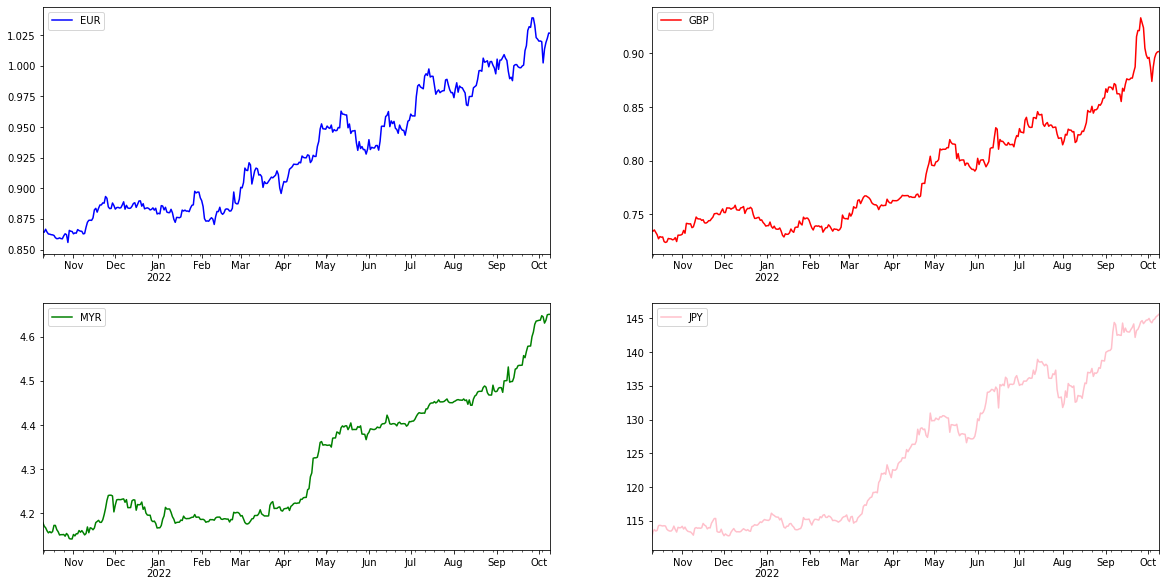

In [23]:
fig, ax = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(20)

tdata.plot(y = 'EUR', kind = 'line', color = 'blue', ax = ax[0, 0])
tdata.plot(y = 'GBP', kind = 'line', color = 'red', ax = ax[0, 1])
tdata.plot(y = 'MYR', kind = 'line', color = 'green', ax = ax[1, 0])
tdata.plot(y = 'JPY', kind = 'line', color = 'pink', ax = ax[1, 1])

# the scales are different for all of these...
# it might be best to add a column that gives the rates in American dollars instead.
# just have to get the calculations right

# it may be best to leave them, though...they are different currencies after all.

# Conclusion

The figures above can be swapped out and replaced with any currency. It might be worth using for a Dash app or Tableau visualization. 